## GTD Data Processing 
We manipuated GTD data and broke it down into 7 tables of interest. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read in data 
df = pd.read_excel('globalterrorismdb_0617dist.xlsx')

In [3]:
# drop rows with na's in latitude, and longitude
df = df[df['latitude'].notnull() & df['longitude'].notnull()]
# convert imonth=0 and iday=0 to NaN
df.loc[df['imonth']==0,'imonth'] = None
df.loc[df['iday']==0, 'iday'] = None

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7.0,2.0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,NaN,NaN,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1.0,NaN,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1.0,NaN,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1.0,NaN,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Incident Table

In [5]:
Incident = df[['eventid', 'iyear', 'imonth', 'iday', 'INT_LOG', 'property', 'nwound', 'nkill']]

# add date
Incident['date'] = pd.to_datetime({'year':df['iyear'], 
                                        'month':df['imonth'],
                                        'day':df['iday']})

# drop year, month, and day
Incident.drop(['iyear','imonth','iday'], inplace=True, axis=1)

# rename colnames
Incident.columns = ['id', 'international', 'property_damage', 'nwound', 'nkill', 'date']

C:\Users\yanxi\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yanxi\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
Incident.head()

,id,international,property_damage,nwound,nkill,date
0,197000000001,0,0,0.0,1.0,1970-07-02
1,197000000002,0,0,0.0,0.0,NaT
2,197001000001,-9,0,0.0,1.0,NaT
3,197001000002,-9,1,NaN,NaN,NaT
4,197001000003,-9,1,NaN,NaN,NaT


### Location table

In [7]:
Location = df[['latitude', 'longitude', 'country_txt', 'provstate', 'city']]

# rename column names
Location.columns = ['latitude', 'longitude', 'country', 'prov_state', 'city']

# drop duplicates based on values of key
Location.drop_duplicates(['latitude', 'longitude'], inplace=True)

C:\Users\yanxi\Anaconda3\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [8]:
Location.head()

,latitude,longitude,country,prov_state,city
0,18.456792,-69.951164,Dominican Republic,NaN,Santo Domingo
1,19.432608,-99.133207,Mexico,NaN,Mexico city
2,15.478598,120.599741,Philippines,Tarlac,Unknown
3,37.983773,23.728157,Greece,Attica,Athens
4,33.580412,130.396361,Japan,NaN,Fukouka


### Happened

In [9]:
Happened = df[['eventid', 'latitude', 'longitude']]
Happened.columns = ['incident_id', 'latitude', 'longitude']

In [10]:
Happened.head()

,incident_id,latitude,longitude
0,197000000001,18.456792,-69.951164
1,197000000002,19.432608,-99.133207
2,197001000001,15.478598,120.599741
3,197001000002,37.983773,23.728157
4,197001000003,33.580412,130.396361


### Targeted table

In [11]:
Targeted = df[['eventid', 'targtype1_txt']]
Targeted.columns = ['incident_id', 'victim_type']

In [12]:
Targeted.head()

,incident_id,victim_type
0,197000000001,Private Citizens & Property
1,197000000002,Government (Diplomatic)
2,197001000001,Journalists & Media
3,197001000002,Government (Diplomatic)
4,197001000003,Government (Diplomatic)


### BelongedTo table

In [13]:
BelongedTo = df[['eventid', 'attacktype1_txt', 'success', 'suicide']]
BelongedTo.columns = ['incident_id', 'attack_type', 'succussful_attack', 'suicide_attack']

In [14]:
BelongedTo.head()

,incident_id,attack_type,succussful_attack,suicide_attack
0,197000000001,Assassination,1,0
1,197000000002,Hostage Taking (Kidnapping),1,0
2,197001000001,Assassination,1,0
3,197001000002,Bombing/Explosion,1,0
4,197001000003,Facility/Infrastructure Attack,1,0


### Used table

In [15]:
Used = df[['eventid', 'weaptype1_txt']]
Used.columns = ['incident_id', 'weapon_type']

In [16]:
Used.head()

,incident_id,weapon_type
0,197000000001,Unknown
1,197000000002,Unknown
2,197001000001,Unknown
3,197001000002,Explosives/Bombs/Dynamite
4,197001000003,Incendiary


### InitiatedBy

In [17]:
InitiatedBy = df[['eventid', 'gname']]
InitiatedBy.columns = ['incident_id', 'perpetrator_name']

In [18]:
InitiatedBy.head()

,incident_id,perpetrator_name
0,197000000001,MANO-D
1,197000000002,23rd of September Communist League
2,197001000001,Unknown
3,197001000002,Unknown
4,197001000003,Unknown


## Visualization
We made several plots to be used on the web application. Suppose time period 1970-2016 and the US are selected by the user. 

### Deaths and injuries

In [19]:
# US only
res1 = Location[Location['country']=='United States']
# merge tables 
res1 = pd.merge(res1, Happened, how='left', on=['latitude', 'longitude'])
res1 = pd.merge(res1, Incident, how='left', left_on='incident_id', right_on='id')

# only keep records in 2000-2016
res1['year'] = res1.apply(lambda row: row['date'].year, axis=1)
res1 = res1[(res1['year']>=1970)&(res1['year']<=2016)]

In [20]:
# summarise number of kills and injuries by year
res1_year = res1.groupby(['year'])[['nwound', 'nkill']].sum()
res1_year.reset_index(inplace=True)

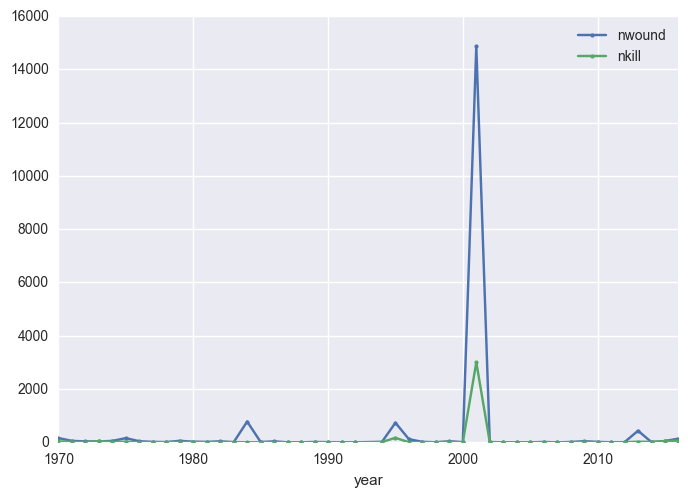

In [65]:
res1_year.plot(x='year', y=['nwound', 'nkill'], marker='o', markersize=3)
plt.show()

### Attack, weapon, and target type

In [22]:
# merge data
res1 = pd.merge(res1, BelongedTo, on='incident_id')
# count by attack_type
res1_attack = res1.groupby('attack_type')[['id']].count()
res1_attack.reset_index(inplace=True)
res1_attack.columns = ['attack_type', 'count']
res1_attack.sort_values(by='count', ascending=False, inplace=True)

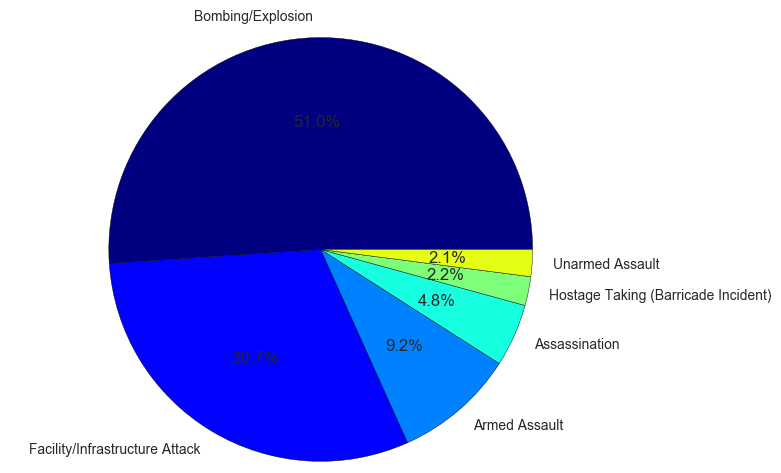

In [58]:
cmap = plt.cm.jet
colors = cmap(np.linspace(0., 1.0, 9))

plt.pie(
    res1_attack.loc[res1_attack['count']>50, 'count'],
    labels = res1_attack.loc[res1_attack['count']>50, 'attack_type'],
    colors=colors,
    autopct='%1.1f%%')

plt.axis('equal')
plt.show()

In [38]:
# count by weapon type
res1 = pd.merge(res1, Used, on='incident_id')
res1_weapon = res1.groupby('weapon_type')[['id']].count()
res1_weapon.reset_index(inplace=True)
res1_weapon.columns = ['weapon_type', 'count']
res1_weapon.sort_values(by='count', ascending=False, inplace=True)

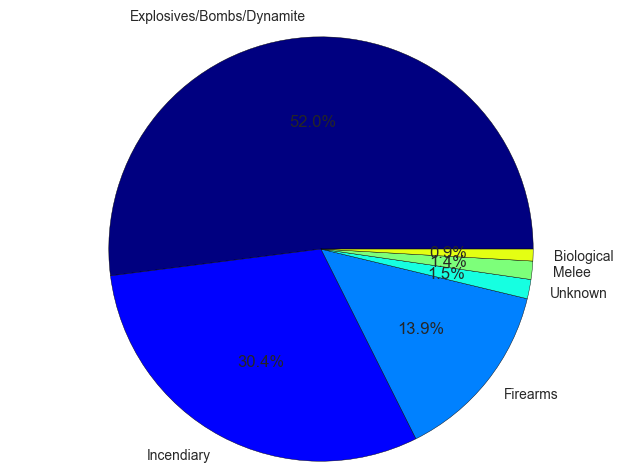

In [44]:
plt.pie(
    res1_weapon.loc[res1_weapon['count']>20, 'count'],
    labels = res1_weapon.loc[res1_weapon['count']>20, 'weapon_type'],
    colors=colors,
    autopct='%1.1f%%')

plt.axis('equal')
plt.show()

In [46]:
# count by victim type
res1 = pd.merge(res1, Targeted, on='incident_id')
res1_victim = res1.groupby('victim_type')[['id']].count()
res1_victim.reset_index(inplace=True)
res1_victim.columns = ['victim_type', 'count']
res1_victim.sort_values(by='count', ascending=False, inplace=True)

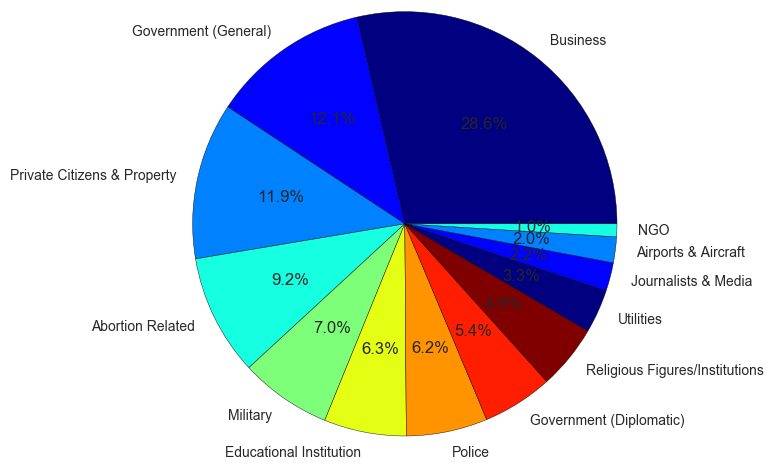

In [48]:
plt.pie(
    res1_victim.loc[res1_victim['count']>20, 'count'],
    labels = res1_victim.loc[res1_victim['count']>20, 'victim_type'],
    colors=colors,
    autopct='%1.1f%%')

plt.axis('equal')
plt.show()